# Predict Future Stock Prices

# Objective: Use historical stock data to predict the next day's closing price.

### 1. Import Libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### 2. Fetch Historical Stock Data

In [2]:
ticker = 'AAPL'  # For: Apple
data = yf.download(ticker, start="2023-01-01", end="2025-01-01")

C:\Users\TJ\AppData\Local\Temp\ipykernel_13888\3729529867.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2023-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.211205,128.954553,122.324579,128.343772,112117500
2023-01-04,124.482048,126.747869,123.221072,125.004170,89113600
2023-01-05,123.161949,125.871079,122.905819,125.240591,80962700
2023-01-06,127.693588,128.353629,123.033890,124.137247,87754700
2023-01-09,128.215698,131.427258,127.959568,128.530950,70790800


In [4]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,502.000000,502.000000,502.000000,502.000000,5.020000e+02
mean,188.245340,189.738990,186.482188,187.975054,5.816095e+07
std,28.114202,28.255519,27.872947,28.108641,2.512372e+07
min,123.161949,125.871079,122.324579,124.137247,2.323470e+07
25%,170.101124,171.723821,168.851309,170.178619,4.495800e+07
50%,183.475327,184.815609,181.857540,183.418837,5.250285e+07
75%,212.831951,215.593987,210.527614,213.052965,6.489808e+07
max,257.853760,258.928914,256.470034,257.027510,3.186799e+08


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2023-01-03 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   502 non-null    float64
 1   (High, AAPL)    502 non-null    float64
 2   (Low, AAPL)     502 non-null    float64
 3   (Open, AAPL)    502 non-null    float64
 4   (Volume, AAPL)  502 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.5 KB


In [6]:
data.isnull().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

### 3. Prepare Features and Target

In [7]:
data['Target'] = data['Close'].shift(-1)
data = data.dropna()

In [8]:
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Target']

### 4. Split Data into Train and Test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### 5. Train the Model (Random Forest Regressor)

In [10]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

### 6. Evaluate the Model

In [11]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf:.4f}")

Random Forest MSE: 80.8907


### 7. Plot Actual vs Predicted Prices

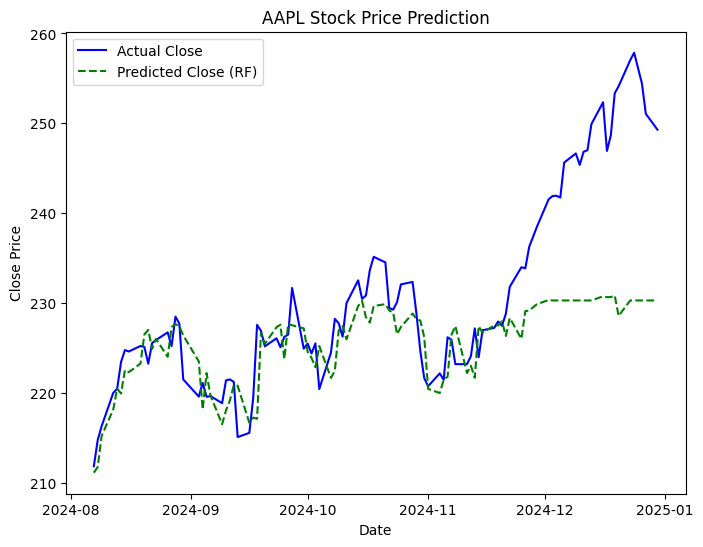

In [13]:
plt.figure(figsize=(8,6))
plt.plot(y_test.index, y_test, label='Actual Close', color='blue')
plt.plot(y_test.index, y_pred_rf, label='Predicted Close (RF)', color='green', linestyle='--')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()